In [1]:
from code.sepconvfull import model2
import torch
from collections import OrderedDict
import dataloader
import matplotlib.pyplot as plt

In [2]:
def convert_weights(weights):
    w = OrderedDict()
    for key in weights:
        new_key = 'get_kernel.'+key
        w[new_key] = weights[key]
        
    return w

In [4]:
sepconv = model2.SepConvNet(kernel_size=51)

weights = torch.load('code/sepconv/network-l1.pytorch')
weights = convert_weights(weights)

sepconv.load_state_dict(weights)


# save old weights
W = sepconv.get_kernel.moduleConv1[0].weight.data
b = sepconv.get_kernel.moduleConv1[0].bias.data

# change architecture (6->12 channels)
sepconv.get_kernel.moduleConv1[0] = torch.nn.Conv2d(12, 32, kernel_size=3, stride=1, padding=1)

# replace old weights for first 6 channels, randomly init others
sepconv.get_kernel.moduleConv1[0].weight.data[:, :6, :, :] = W
sepconv.get_kernel.moduleConv1[0].bias.data = b

sepconv = sepconv.cuda()

In [5]:
ds = dataloader.adobe240_dataset(quadratic=True)
ds = dataloader.TransformedDataset(ds)
dl = torch.utils.data.DataLoader(ds)

In [6]:
for X, y in dl:
    break

In [7]:
X[0] = X[0].cuda()
X[1] = X[1].cuda()
X[2] = X[2].cuda()
X[3] = X[3].cuda()
y = y.cuda()

In [8]:
len(X)

4

In [9]:
y_hat = sepconv(X)

lframes 4
lpframes 4
<class 'list'>
torch.Size([1, 3, 128, 128])
torch.Size([1, 3, 128, 128])
torch.Size([1, 3, 128, 128])
torch.Size([1, 3, 128, 128])


In [10]:
y_hat

torch.Size([1, 3, 128, 128])

In [18]:
_, _, h, w = X[0].shape

In [21]:
y_hat.shape

torch.Size([1, 3, 128, 128])

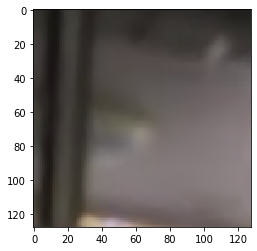

In [22]:
plt.imshow(y_hat[0].mul(255).clamp(0,255).detach().permute(1,2,0).cpu().int())